In [551]:
pip install --user selenium

Note: you may need to restart the kernel to use updated packages.


### Imported Libraries and functions

In [689]:
from selenium import webdriver
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from selenium.common.exceptions import TimeoutException
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
import time
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
import plotly.graph_objects as go
from sklearn.linear_model import LogisticRegression
import plotly.express as px
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import SimpleRNN, Dropout, Dense
from tensorflow.keras.optimizers import Adam

### Web Scrapping

In [557]:
s = Service("C:/Users/bassam/Downloads/chromedriver-win64/chromedriver-win64/chromedriver.exe")

driver1 = webdriver.Chrome(service = s)
driver2 = webdriver.Chrome(service = s)

In [559]:
while True:
    ground_input = input("Enter 1 for 'home' or 0 for 'away': ")
    
    # Validate the input
    if ground_input in ['0', '1']:
        match_ground = int(ground_input)
        if match_ground == 1:
            print("You selected 'home'.")
        else:
            print("You selected 'away'.")
        break  # Exit the loop when correct input is given
    else:
        print("Invalid input. Please enter 1 for 'home' or 0 for 'away'.")
        
while True:
    myteam = input("Enter your team name: ")
    myteam = myteam.lower().replace(" ", "-")
    driver1.get('https://www.skysports.com/{}-results'.format(myteam))

    try:
        error_element = WebDriverWait(driver1, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, 'not-found__title'))
        )
        print("Team does not exist. Enter a valid team.")
    except:
        print("Team found.")
        break  # Exit the loop once a valid team is found

while True:
    oppteam = input("Enter your opponent team name: ")
    
    oppteam = oppteam.lower().replace(" ", "-")
    
    # Check if the selected teams are the same
    if myteam == oppteam:
        print("Your team and the opponent team cannot be the same. Please enter a different opponent team.")
        continue  # Ask for a new opponent team if they're the same
    
    driver2.get('https://www.skysports.com/{}-results'.format(oppteam))

    try:
        error_element = WebDriverWait(driver2, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, 'not-found__title'))
        )
        print("Team does not exist. Enter a valid team.")
    except:
        print("Team found.")
        break  # Exit the loop once a valid opponent team is found


Enter 1 for 'home' or 0 for 'away':  1


You selected 'home'.


Enter your team name:  barcelona


Team found.


Enter your opponent team name:  real madrid


Team found.


In [561]:
driver1.switch_to.frame(1)

try:
    accept_button = WebDriverWait(driver1, 10).until(
        EC.element_to_be_clickable((By.XPATH, '/html/body/div/div[2]/div[5]/button[3]'))
    )
    accept_button.click()
    print("Cookies accepted.")
except Exception as e:
    print(f"Accept Cookies button not found or clickable: {e}")
finally:
    driver1.switch_to.default_content()

driver2.switch_to.frame(1)

try:
    accept_button = WebDriverWait(driver2, 10).until(
        EC.element_to_be_clickable((By.XPATH, '/html/body/div/div[2]/div[5]/button[3]'))
    )
    accept_button.click()
    print("Cookies accepted.")
except Exception as e:
    print(f"Accept Cookies button not found or clickable: {e}")
finally:
    driver2.switch_to.default_content()

Cookies accepted.
Cookies accepted.


In [563]:
year = 24
goals = []
teams1 = []
teams2 = []
result = []
dates=[]
dateyear = 2024
for k in range(5):
    
    goals1 = WebDriverWait(driver1,2).until(EC.presence_of_all_elements_located((By.XPATH,'//span[@class="matches__teamscores"]')))
    team1 = WebDriverWait(driver1,2).until(EC.presence_of_all_elements_located((By.XPATH,'//span[@class="swap-text--bp30"]')))
    date1=WebDriverWait(driver1,2).until(EC.presence_of_all_elements_located((By.XPATH,'//h4[@class="fixres__header2"]')))
    for g in goals1:
        goals.append(g.text)
    
        
    
    for i in range(len(team1)):
        if i%2 == 0:
            teams1.append(team1[i].text)
        else:
            teams2.append(team1[i].text)
  
    for element in date1:
        dates.append(element.text + ', ' + str(dateyear))
            

    dateyear=dateyear-1        
    year=year-1
    print(year)
    season = ("20{}-{}".format(year, year+1))
    
    driver1.get('https://www.skysports.com/{}-results/{}'.format(myteam,season))
goals = [item.split() for item in goals]
for i in range(len(teams1)):
    g1, g2 = goals[i]
    
    if teams1[i].lower().replace(" ", "-") == myteam:
          
        result.append([g1, g2, teams2[i], 'Home', dates[i]])
    elif teams2[i].lower().replace(" ", "-") == myteam:
           
        result.append([g2, g1, teams1[i], 'Away', dates[i]])

23
22
21
20
19


In [565]:
#teams
print('Barcelona')
print('Real Madrid')
print('Chelsea')
print('Liverpool')
print('Manchester United')
print('Manchester City')
print('Arsenal')
print('Juventus')
print('Inter Milan')
print('PSG')
print('Bayern Munich')
print('Atletico Madrid')

Barcelona
Real Madrid
Chelsea
Liverpool
Manchester United
Manchester City
Arsenal
Juventus
Inter Milan
PSG
Bayern Munich
Atletico Madrid


In [567]:
      
myteam_df = pd.DataFrame(result, columns=['Goals_Scored', 'Goals_Against', 'Played_Against', 'Ground','Date'])

conditions = [
    myteam_df['Goals_Scored'] > myteam_df['Goals_Against'],
    myteam_df['Goals_Scored'] < myteam_df['Goals_Against'],
    myteam_df['Goals_Scored'] == myteam_df['Goals_Against']
]

values = ['win', 'lost', 'draw']

myteam_df['result'] = np.select(conditions, values)


heading = "{} Results".format(myteam)
heading = heading.upper()
print("\n" + heading)
print("=" * len(heading))

myteam_df


BARCELONA RESULTS


,Goals_Scored,Goals_Against,Played_Against,Ground,Date,result
0,2,2,Real Betis,Away,"Saturday 7th December, 2024",draw
1,5,1,Real Mallorca,Away,"Tuesday 3rd December, 2024",win
2,1,2,Las Palmas,Home,"Saturday 30th November, 2024",lost
3,3,0,Brest,Home,"Tuesday 26th November, 2024",win
4,2,2,Celta Vigo,Away,"Saturday 23rd November, 2024",draw
...,...,...,...,...,...,...
250,1,1,Sevilla,Home,"Sunday 4th October, 2020",draw
251,3,0,Celta Vigo,Away,"Thursday 1st October, 2020",win
252,4,0,Villarreal,Home,"Sunday 27th September, 2020",win
253,3,1,Girona,Home,"Wednesday 16th September, 2020",win


In [569]:
year = 24
goals = []
teams1 = []
teams2 = []
result = []
dates=[]
dateyear = 2024
for k in range(5):
    
    goals2 = WebDriverWait(driver2,2).until(EC.presence_of_all_elements_located((By.XPATH,'//span[@class="matches__teamscores"]')))
    team2 = WebDriverWait(driver2,2).until(EC.presence_of_all_elements_located((By.XPATH,'//span[@class="swap-text--bp30"]')))
    date2=WebDriverWait(driver2,2).until(EC.presence_of_all_elements_located((By.XPATH,'//h4[@class="fixres__header2"]')))
    for g in goals2:
        goals.append(g.text)
    
        
    
    for i in range(len(team2)):
        if i%2 == 0:
            teams1.append(team2[i].text)
        else:
            teams2.append(team2[i].text)
    for element in date2:
        dates.append(element.text + ', ' + str(dateyear))
            

    dateyear=dateyear-1       
    
            

            
    year = year - 1
    print(year)
    season = ("20{}-{}".format(year, year+1))
    
    driver2.get('https://www.skysports.com/{}-results/{}'.format(oppteam,season))
goals = [item.split() for item in goals]
for i in range(len(teams1)):
    g1, g2 = goals[i]
    
    if teams1[i].lower().replace(" ", "-") == oppteam:
          
        result.append([g1, g2, teams2[i], 'Home',dates[i]])
    elif teams2[i].lower().replace(" ", "-") == oppteam:
          
        result.append([g2, g1, teams1[i], 'Away',dates[i]])

23
22
21
20
19


In [571]:
oppteam_df = pd.DataFrame(result, columns=['Goals_Scored', 'Goals_Against', 'Played_Against', 'Ground','Date'])

conditions = [
    oppteam_df['Goals_Scored'] > oppteam_df['Goals_Against'],
    oppteam_df['Goals_Scored'] < oppteam_df['Goals_Against'],
    oppteam_df['Goals_Scored'] == oppteam_df['Goals_Against']
]

values = ['win', 'lost', 'draw']

oppteam_df['result'] = np.select(conditions, values)

heading = "{} Results".format(oppteam)
heading = heading.upper()
print("\n" + heading)
print("=" * len(heading))
oppteam_df


REAL-MADRID RESULTS


,Goals_Scored,Goals_Against,Played_Against,Ground,Date,result
0,3,0,Girona,Away,"Saturday 7th December, 2024",win
1,1,2,Athletic Bilbao,Away,"Wednesday 4th December, 2024",lost
2,2,0,Getafe,Home,"Sunday 1st December, 2024",win
3,0,2,Liverpool,Away,"Wednesday 27th November, 2024",lost
4,3,0,Leganes,Away,"Sunday 24th November, 2024",win
...,...,...,...,...,...,...
251,0,1,Cadiz,Home,"Saturday 17th October, 2020",lost
252,2,0,Levante,Away,"Sunday 4th October, 2020",win
253,1,0,Real Valladolid,Home,"Wednesday 30th September, 2020",win
254,3,2,Real Betis,Away,"Saturday 26th September, 2020",win


In [575]:
df_against = myteam_df[myteam_df['Played_Against'].str.lower().str.replace(" ", "-") == oppteam]

df_against = df_against.rename(columns={'Goals_Scored': '{}_goals'.format(myteam)})
df_against = df_against.rename(columns={'Goals_Against': '{}_goals'.format(oppteam)})
df_against = df_against.drop(columns=['Played_Against'])
mygoals= "{}_goals".format(myteam)
oppgoals= "{}_goals".format(oppteam)
heading = "{} vs {} Results".format(myteam, oppteam)
heading = heading.upper()
print("\n" + heading)
print("=" * len(heading))
df_against


BARCELONA VS REAL-MADRID RESULTS


,barcelona_goals,real-madrid_goals,Ground,Date,result
8,4,0,Away,"Saturday 26th October, 2024",win
23,2,1,Away,"Sunday 4th August, 2024",win
31,2,3,Away,"Sunday 21st April, 2023",lost
50,1,4,Away,"Sunday 14th January, 2023",lost
65,1,2,Home,"Saturday 28th October, 2023",lost
80,3,0,Home,"Saturday 29th July, 2023",win
94,0,4,Home,"Wednesday 5th April, 2022",lost
96,2,1,Home,"Sunday 19th March, 2022",win
99,1,0,Away,"Thursday 2nd March, 2022",win
111,3,1,Away,"Sunday 15th January, 2022",win


### Data Preprocessing

In [577]:
#data preprocessing
#Encoding
myteam_df.drop_duplicates(inplace=True)
oppteam_df.drop_duplicates(inplace=True)
myteam_df.dropna(inplace=True)
oppteam_df.dropna(inplace=True)

myteam_df['Ground_Encoded'] = myteam_df['Ground'].map({'Home': 1, 'Away': 0})
oppteam_df['Ground_Encoded'] = oppteam_df['Ground'].map({'Home': 1, 'Away': 0})
df_against['Ground_Encoded'] = df_against['Ground'].map({'Home': 1, 'Away': 0})
myteam_df['Result_encoded'] = myteam_df['result'].map({'win': 2, 'draw': 1, 'lost': 0})
oppteam_df['Result_encoded'] = oppteam_df['result'].map({'win': 2, 'draw': 1, 'lost': 0})
df_against['Result_encoded'] = df_against['result'].map({'win': 2, 'draw': 1, 'lost': 0})

In [579]:


def calculate_form(df, goals_col, conceded_col):
    
    df[goals_col] = pd.to_numeric(df[goals_col], errors='coerce')
    df[conceded_col] = pd.to_numeric(df[conceded_col], errors='coerce')
 
    df['Goal_Difference'] = df[goals_col] - df[conceded_col]
    
    df_reversed = df.iloc[::-1].copy() 
    sequence_length = 10 

    df_reversed['Form'] = df_reversed['Goal_Difference'].rolling(window=sequence_length).mean().fillna(0)
    
    df['Form'] = df_reversed['Form'].iloc[::-1].values  

    scaler = MinMaxScaler(feature_range=(-1, 1))
    df['Scaled_Form'] = scaler.fit_transform(df[['Form']])
    df['Scaled_Form'] = df['Scaled_Form'].round(2)
    return df

sequence_length = 10 
myteam_goals= "{}_goals".format(myteam)

myteam_df = calculate_form(myteam_df, 'Goals_Scored', 'Goals_Against')
oppteam_df = calculate_form(oppteam_df, 'Goals_Scored', 'Goals_Against')

df_against.iloc[:, 0] = pd.to_numeric(df_against.iloc[:, 0], errors='coerce')  
df_against.iloc[:, 1] = pd.to_numeric(df_against.iloc[:, 1], errors='coerce')  

myteam_df['Goal_Difference'] = myteam_df['Goal_Difference'].apply(lambda x: 4 if x > 4 else x)
myteam_df['Goal_Difference'] = myteam_df['Goal_Difference'].apply(lambda x: -4 if x < -4 else x)
oppteam_df['Goal_Difference'] = oppteam_df['Goal_Difference'].apply(lambda x: 4 if x > 4 else x)
oppteam_df['Goal_Difference'] = oppteam_df['Goal_Difference'].apply(lambda x: -4 if x < -4 else x)


In [581]:
df_against = myteam_df[myteam_df['Played_Against'].str.lower().str.replace(" ", "-") == oppteam]

df_against = df_against.rename(columns={'Goals_Scored': '{}_goals'.format(myteam)})
df_against = df_against.rename(columns={'Goals_Against': '{}_goals'.format(oppteam)})
df_against = df_against.drop(columns=['Played_Against'])
mygoals= "{}_goals".format(myteam)
oppgoals= "{}_goals".format(oppteam)
heading = "{} vs {} Results".format(myteam, oppteam)
heading = heading.upper()
print("\n" + heading)
print("=" * len(heading))
df_against


BARCELONA VS REAL-MADRID RESULTS


,barcelona_goals,real-madrid_goals,Ground,Date,result,Ground_Encoded,Result_encoded,Goal_Difference,Form,Scaled_Form
8,4,0,Away,"Saturday 26th October, 2024",win,0,2,4,2.4,0.81
23,2,1,Away,"Sunday 4th August, 2024",win,0,2,1,0.5,-0.42
31,2,3,Away,"Sunday 21st April, 2023",lost,0,0,-1,0.9,-0.16
50,1,4,Away,"Sunday 14th January, 2023",lost,0,0,-3,-0.1,-0.81
65,1,2,Home,"Saturday 28th October, 2023",lost,1,0,-1,1.4,0.16
80,3,0,Home,"Saturday 29th July, 2023",win,1,2,3,0.9,-0.16
94,0,4,Home,"Wednesday 5th April, 2022",lost,1,0,-4,0.4,-0.48
96,2,1,Home,"Sunday 19th March, 2022",win,1,2,1,0.8,-0.23
99,1,0,Away,"Thursday 2nd March, 2022",win,0,2,1,0.8,-0.23
111,3,1,Away,"Sunday 15th January, 2022",win,0,2,2,0.7,-0.29


In [583]:
myteam_df.head(10)

,Goals_Scored,Goals_Against,Played_Against,Ground,Date,result,Ground_Encoded,Result_encoded,Goal_Difference,Form,Scaled_Form
0,2,2,Real Betis,Away,"Saturday 7th December, 2024",draw,0,1,0,1.7,0.35
1,5,1,Real Mallorca,Away,"Tuesday 3rd December, 2024",win,0,2,4,2.1,0.61
2,1,2,Las Palmas,Home,"Saturday 30th November, 2024",lost,1,0,-1,2.0,0.55
3,3,0,Brest,Home,"Tuesday 26th November, 2024",win,1,2,3,2.6,0.94
4,2,2,Celta Vigo,Away,"Saturday 23rd November, 2024",draw,0,1,0,2.1,0.61
5,0,1,Real Sociedad,Away,"Sunday 10th November, 2024",lost,0,0,-1,2.2,0.68
6,5,2,Crvena Zvezda,Away,"Wednesday 6th November, 2024",win,0,2,3,2.7,1.00
7,3,1,Espanyol,Home,"Sunday 3rd November, 2024",win,1,2,2,2.3,0.74
8,4,0,Real Madrid,Away,"Saturday 26th October, 2024",win,0,2,4,2.4,0.81
9,4,1,Bayern Munich,Home,"Wednesday 23rd October, 2024",win,1,2,3,2.7,1.00


In [585]:
df_against.head(10)

,barcelona_goals,real-madrid_goals,Ground,Date,result,Ground_Encoded,Result_encoded,Goal_Difference,Form,Scaled_Form
8,4,0,Away,"Saturday 26th October, 2024",win,0,2,4,2.4,0.81
23,2,1,Away,"Sunday 4th August, 2024",win,0,2,1,0.5,-0.42
31,2,3,Away,"Sunday 21st April, 2023",lost,0,0,-1,0.9,-0.16
50,1,4,Away,"Sunday 14th January, 2023",lost,0,0,-3,-0.1,-0.81
65,1,2,Home,"Saturday 28th October, 2023",lost,1,0,-1,1.4,0.16
80,3,0,Home,"Saturday 29th July, 2023",win,1,2,3,0.9,-0.16
94,0,4,Home,"Wednesday 5th April, 2022",lost,1,0,-4,0.4,-0.48
96,2,1,Home,"Sunday 19th March, 2022",win,1,2,1,0.8,-0.23
99,1,0,Away,"Thursday 2nd March, 2022",win,0,2,1,0.8,-0.23
111,3,1,Away,"Sunday 15th January, 2022",win,0,2,2,0.7,-0.29


### Machine Learning Models 

### Logistic Regression

In [587]:
#Logistic Regression
def predict_probabilities(df, ground_input, row_index):

    X = df[['Ground_Encoded', 'Scaled_Form']] 
    y = df['Result_encoded']  
 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    #evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision (Weighted): {precision:.2f}")
    print(f"Recall (Weighted): {recall:.2f}")
    print(f"F1-Score (Weighted): {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    value = df['Scaled_Form'].iloc[row_index] 

    new_input = pd.DataFrame({'Ground_Encoded': [ground_input], 'Scaled_Form': [value]})
    
    predicted_proba = model.predict_proba(new_input)[0] 
    predicted_classes = model.classes_ 
   
    all_classes = [0, 1, 2] 
    final_probabilities = [0.0] * len(all_classes) 

    for idx, cls in enumerate(predicted_classes):
        final_probabilities[cls] = predicted_proba[idx]
    final_probabilities = np.array(final_probabilities)

    print(f"Predicted Probabilities - Loss: {final_probabilities[0]:.2f}, "
          f"Draw: {final_probabilities[1]:.2f}, Win: {final_probabilities[2]:.2f}")

    evaluation_metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': conf_matrix
    }




    return final_probabilities, evaluation_metrics

ground_input = int(ground_input)
predicted_probs1,eval1 = predict_probabilities(myteam_df, ground_input, 0)
ground_input = 1 - ground_input 
predicted_probs2,eval2 = predict_probabilities(oppteam_df, ground_input, 0)
ground_input = 1 - ground_input 
predicted_probs3,eval3 = predict_probabilities(df_against, ground_input, 0)

Model Evaluation Metrics:
Accuracy: 0.64
Precision (Weighted): 0.41
Recall (Weighted): 0.64
F1-Score (Weighted): 0.50
Confusion Matrix:
[[ 0  0 14]
 [ 0  0  9]
 [ 0  0 41]]
Predicted Probabilities - Loss: 0.09, Draw: 0.12, Win: 0.79
Model Evaluation Metrics:
Accuracy: 0.72
Precision (Weighted): 0.54
Recall (Weighted): 0.72
F1-Score (Weighted): 0.61
Confusion Matrix:
[[ 0  0  9]
 [ 0  0  8]
 [ 1  0 46]]
Predicted Probabilities - Loss: 0.26, Draw: 0.21, Win: 0.53
Model Evaluation Metrics:
Accuracy: 0.20
Precision (Weighted): 0.40
Recall (Weighted): 0.20
F1-Score (Weighted): 0.27
Confusion Matrix:
[[0 1]
 [3 1]]
Predicted Probabilities - Loss: 0.49, Draw: 0.00, Win: 0.51


C:\Users\bassam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\bassam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Final Match Probabilities - Win: 0.52, Draw: 0.11, Loss: 0.37

Averaged Evaluation Metrics:
Accuracy: 0.52
Precision: 0.45
Recall: 0.52
F1-Score: 0.46

Averaged Labeled Confusion Matrix:
           Pred Loss  Pred Draw   Pred Win
True Loss   0.000000   0.333333   7.666667
True Draw   1.000000   0.333333   5.666667
True Win    0.333333   0.000000  29.000000


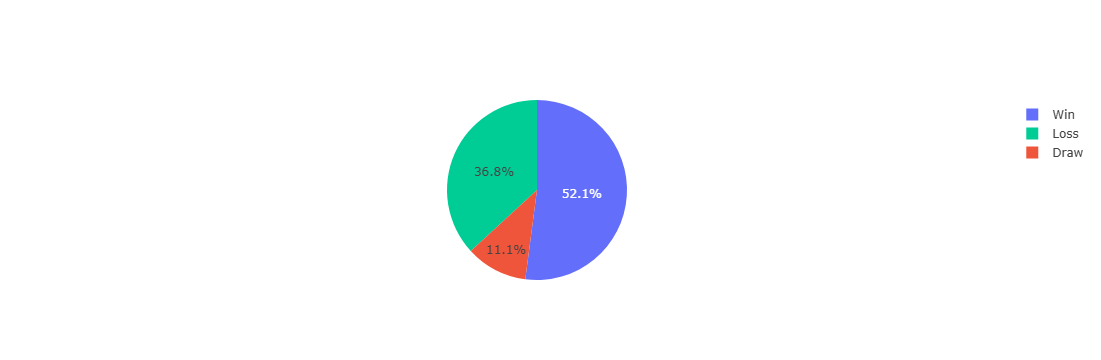

In [589]:

min_length = min(len(predicted_probs1), len(predicted_probs2), len(predicted_probs3))
predict_myteam = predicted_probs1[:min_length]
predict_oppteam = predicted_probs2[:min_length]
predict_against = predicted_probs3[:min_length]

prob_myteam = np.array(predict_myteam)  
prob_oppteam = np.array(predict_oppteam)
prob_against = np.array(predict_against)


if prob_myteam.ndim != 1 or prob_oppteam.ndim != 1 or prob_against.ndim != 1:
    raise ValueError("The predicted probabilities are not 1-dimensional arrays. Check your function outputs.")

prob_oppteam = prob_oppteam[::-1]

combined_predict = (prob_myteam + prob_oppteam + prob_against) / 3

avg_accuracy = (eval1['accuracy'] + eval2['accuracy'] + eval3['accuracy']) / 3
avg_precision = (eval1['precision'] + eval2['precision'] + eval3['precision']) / 3
avg_recall = (eval1['recall'] + eval2['recall'] + eval3['recall']) / 3
avg_f1_score = (eval1['f1_score'] + eval2['f1_score'] + eval3['f1_score']) / 3

def standardize_conf_matrix(conf_matrix, size=3):
 
    conf_matrix = np.array(conf_matrix)
    standardized_matrix = np.zeros((size, size), dtype=conf_matrix.dtype)
    rows, cols = conf_matrix.shape
    standardized_matrix[:rows, :cols] = conf_matrix
    return standardized_matrix

conf_matrix1 = standardize_conf_matrix(eval1['confusion_matrix'])
conf_matrix2 = standardize_conf_matrix(eval2['confusion_matrix'])
conf_matrix3 = standardize_conf_matrix(eval3['confusion_matrix'])

avg_conf_matrix = (conf_matrix1 + conf_matrix2 + conf_matrix3) / 3

class_labels = ['Loss', 'Draw', 'Win']

labeled_avg_conf_matrix = pd.DataFrame(
    avg_conf_matrix,
    index=[f"True {label}" for label in class_labels],  
    columns=[f"Pred {label}" for label in class_labels] 
)

print(f"Final Match Probabilities - Win: {combined_predict[2]:.2f}, Draw: {combined_predict[1]:.2f}, Loss: {combined_predict[0]:.2f}")

print("\nAveraged Evaluation Metrics:")
print(f"Accuracy: {avg_accuracy:.2f}")
print(f"Precision: {avg_precision:.2f}")
print(f"Recall: {avg_recall:.2f}")
print(f"F1-Score: {avg_f1_score:.2f}")
print("\nAveraged Labeled Confusion Matrix:")
print(labeled_avg_conf_matrix)
#Pie chart
labels = ['Win', 'Draw', 'Loss' ]
values = [combined_predict[2], combined_predict[1], combined_predict[0]]

colors = ['#636EFA', '#EF553B', '#00CC96']

fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values,
    marker=dict(colors=colors)  
)])


fig.show()

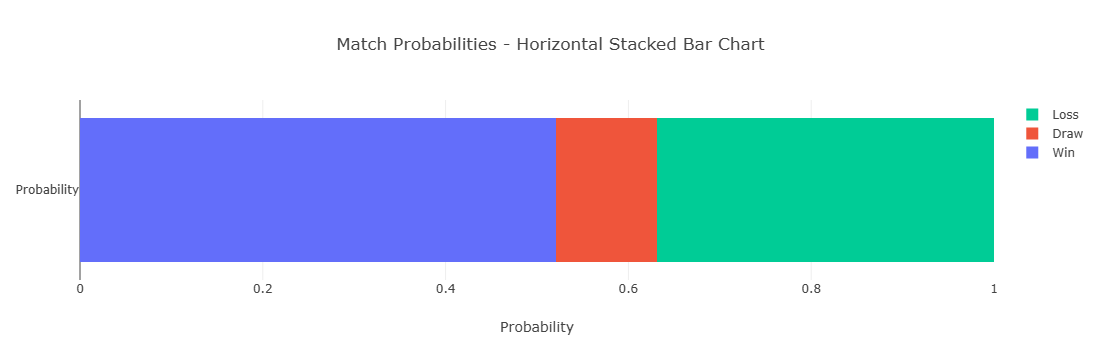

In [591]:
#Horizontal Stacked Bar Chart
labels = ['Win', 'Draw', 'Loss']
values = [combined_predict[2], combined_predict[1], combined_predict[0]] 
colors = ['#636EFA', '#EF553B', '#00CC96']


fig = go.Figure()

fig.add_trace(go.Bar(
    y=['Probability'],  
    x=[values[0]],
    name='Win',
    orientation='h',
    marker=dict(color=colors[0])  
))

fig.add_trace(go.Bar(
    y=['Probability'],
    x=[values[1]], 
    name='Draw',
    orientation='h',
    marker=dict(color=colors[1])  
))

fig.add_trace(go.Bar(
    y=['Probability'],
    x=[values[2]], 
    name='Loss',
    orientation='h',
    marker=dict(color=colors[2])  
))

fig.update_layout(
    barmode='stack',
    title='Match Probabilities - Horizontal Stacked Bar Chart',
    xaxis_title='Probability',
    yaxis_title='',
    xaxis=dict(range=[0, 1]),  
    showlegend=True
)

fig.show()


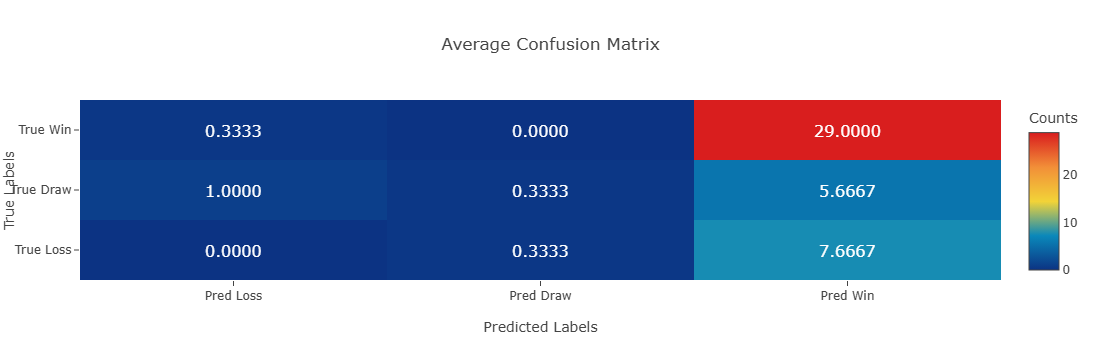

In [593]:
#heatmap for confusion matrix
fig = go.Figure(data=go.Heatmap(
    z=labeled_avg_conf_matrix.values,  
    x=labeled_avg_conf_matrix.columns,  
    y=labeled_avg_conf_matrix.index,   
    colorscale='Portland', 
    colorbar=dict(title='Counts'),
    hoverongaps=False 
))

for i in range(len(labeled_avg_conf_matrix)):
    for j in range(len(labeled_avg_conf_matrix.columns)):
        fig.add_annotation(
            x=j,
            y=i,
            text=f"{labeled_avg_conf_matrix.iloc[i, j]:.4f}",  
            showarrow=False,
            font=dict(color="white", size=16), 
            align="center"
        )

fig.update_layout(
    title='Average Confusion Matrix',
    xaxis_title='Predicted Labels',
    yaxis_title='True Labels',
    xaxis=dict(tickmode='array', tickvals=[0, 1, 2]),
    yaxis=dict(tickmode='array', tickvals=[0, 1, 2]),
)

fig.show()


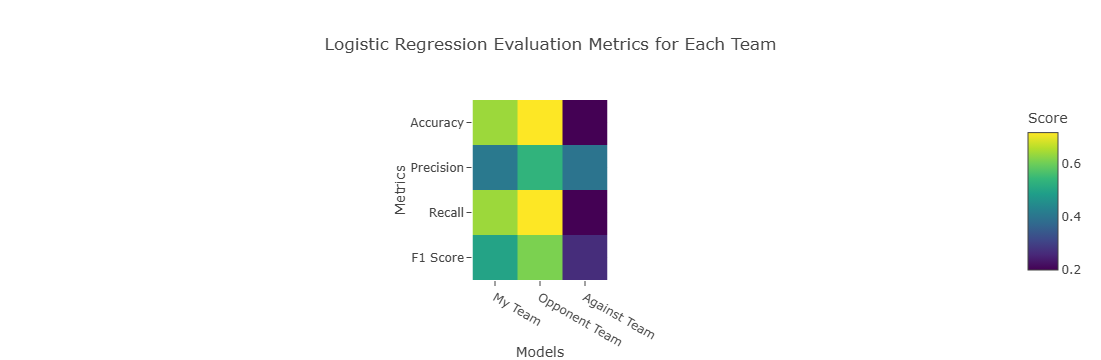

In [595]:
#heatmap for evaluation metrics
metrics_df_logreg = pd.DataFrame({
    'Model': ['My Team', 'Opponent Team', 'Against Team'],
    'Accuracy': [eval1['accuracy'], eval2['accuracy'], eval3['accuracy']],
    'Precision': [eval1['precision'], eval2['precision'], eval3['precision']],
    'Recall': [eval1['recall'], eval2['recall'], eval3['recall']],
    'F1 Score': [eval1['f1_score'], eval2['f1_score'], eval3['f1_score']]
})

fig = px.imshow(metrics_df_logreg.set_index('Model').T, 
                labels=dict(x="Models", y="Metrics", color="Score"),
                color_continuous_scale='Viridis',
                title="Logistic Regression Evaluation Metrics for Each Team")

fig.show()


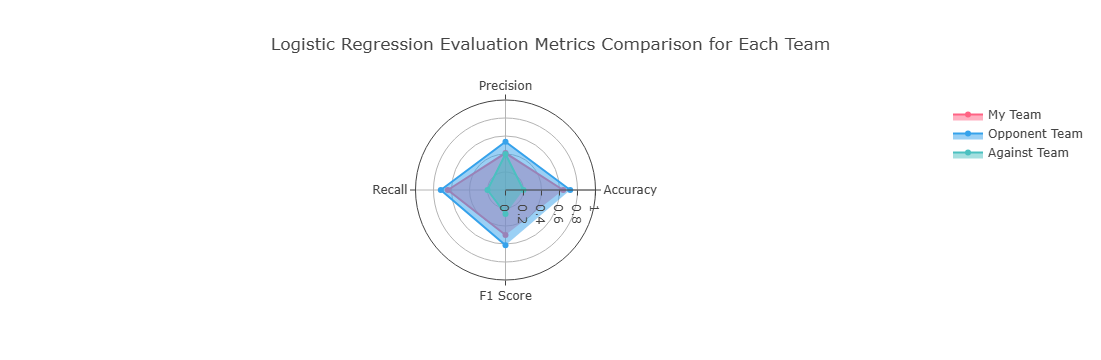

In [597]:
#radar chart
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
myteam_metrics_logreg = [eval1['accuracy'], eval1['precision'], eval1['recall'], eval1['f1_score']]
oppteam_metrics_logreg = [eval2['accuracy'], eval2['precision'], eval2['recall'], eval2['f1_score']]
against_metrics_logreg = [eval3['accuracy'], eval3['precision'], eval3['recall'], eval3['f1_score']]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=myteam_metrics_logreg,
    theta=labels,
    fill='toself',
    name='My Team',
    line=dict(color='rgb(255, 99, 132)')  
))

fig.add_trace(go.Scatterpolar(
    r=oppteam_metrics_logreg,
    theta=labels,
    fill='toself',
    name='Opponent Team',
    line=dict(color='rgb(54, 162, 235)') 
))

fig.add_trace(go.Scatterpolar(
    r=against_metrics_logreg,
    theta=labels,
    fill='toself',
    name='Against Team',
    line=dict(color='rgb(75, 192, 192)')  
))

fig.update_layout(
    title='Logistic Regression Evaluation Metrics Comparison for Each Team',
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    showlegend=True
)

fig.show()


In [599]:

final_probs = combined_predict
print(f"Final Match Probabilities - Win: {final_probs[2]:.2f}, Draw: {final_probs[1]:.2f}, Loss: {final_probs[0]:.2f}")

Final Match Probabilities - Win: 0.52, Draw: 0.11, Loss: 0.37


### Naive Bayes

In [601]:

def predict_probabilities_naive_bayes(df, ground_input, row_index):
  
    X = df[['Ground_Encoded', 'Scaled_Form']] 
    y = df['Result_encoded'] 

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
 
    model = GaussianNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    # evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print("Model Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision (Weighted): {precision:.2f}")
    print(f"Recall (Weighted): {recall:.2f}")
    print(f"F1-Score (Weighted): {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    value = df['Scaled_Form'].iloc[row_index]
 
    new_input = pd.DataFrame({'Ground_Encoded': [ground_input], 'Scaled_Form': [value]})

    predicted_proba = model.predict_proba(new_input)[0]  

    predicted_classes = model.classes_  

    all_classes = [0, 1, 2] 
    final_probabilities = [0.0] * len(all_classes) 

    for idx, cls in enumerate(predicted_classes):
        final_probabilities[cls] = predicted_proba[idx]
    final_probabilities = np.array(final_probabilities)

    print(f"Predicted Probabilities - Loss: {final_probabilities[0]:.2f}, "
          f"Draw: {final_probabilities[1]:.2f}, Win: {final_probabilities[2]:.2f}")

    evaluation_metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': conf_matrix
    }

    return final_probabilities,evaluation_metrics

ground_input=int(ground_input)
predicted_probs1_nb,eval_nb1 = predict_probabilities_naive_bayes(myteam_df, ground_input, 0)

ground_input = 1 - ground_input 
predicted_probs2_nb,eval_nb2 = predict_probabilities_naive_bayes(oppteam_df, ground_input, 0)

ground_input = 1 - ground_input 
predicted_probs3_nb,eval_nb3 = predict_probabilities_naive_bayes(df_against, ground_input, 0)


Model Evaluation Metrics:
Accuracy: 0.56
Precision (Weighted): 0.52
Recall (Weighted): 0.56
F1-Score (Weighted): 0.42
Confusion Matrix:
[[ 1  0 13]
 [ 0  0 15]
 [ 0  0 35]]
Predicted Probabilities - Loss: 0.12, Draw: 0.06, Win: 0.82
Model Evaluation Metrics:
Accuracy: 0.66
Precision (Weighted): 0.53
Recall (Weighted): 0.66
F1-Score (Weighted): 0.55
Confusion Matrix:
[[ 2  0  9]
 [ 0  0 12]
 [ 1  0 40]]
Predicted Probabilities - Loss: 0.31, Draw: 0.19, Win: 0.50
Model Evaluation Metrics:
Accuracy: 0.40
Precision (Weighted): 0.16
Recall (Weighted): 0.40
F1-Score (Weighted): 0.23
Confusion Matrix:
[[2 0]
 [3 0]]
Predicted Probabilities - Loss: 0.31, Draw: 0.00, Win: 0.69


C:\Users\bassam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\bassam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\bassam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Final Match Probabilities - Win: 0.61, Draw: 0.08, Loss: 0.31

Averaged Evaluation Metrics:
Accuracy: 0.54
Precision: 0.41
Recall: 0.54
F1-Score: 0.40

Averaged Labeled Confusion Matrix:
           Pred Loss  Pred Draw   Pred Win
True Loss   1.666667        0.0   7.333333
True Draw   1.000000        0.0   9.000000
True Win    0.333333        0.0  25.000000


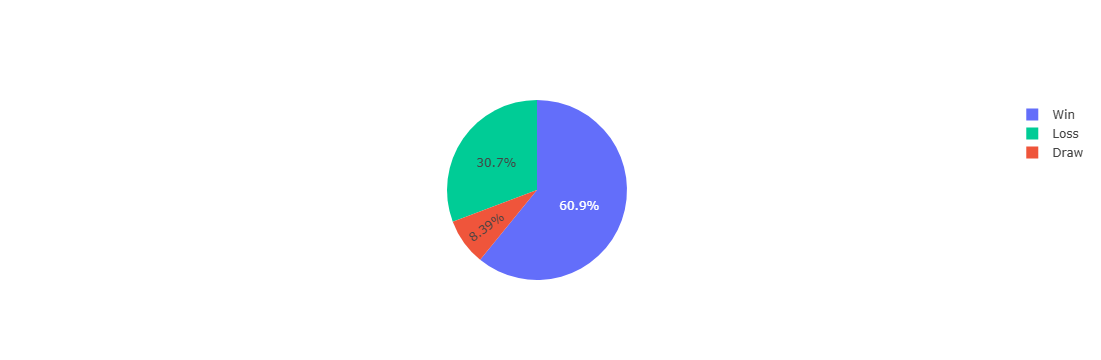

In [603]:

min_length = min(len(predicted_probs1_nb), len(predicted_probs2_nb), len(predicted_probs3_nb))

predict_myteam = predicted_probs1_nb[:min_length]
predict_oppteam = predicted_probs2_nb[:min_length]
predict_against = predicted_probs3_nb[:min_length]

prob_myteam = np.array(predict_myteam)  
prob_oppteam = np.array(predict_oppteam)
prob_against = np.array(predict_against)

if prob_myteam.ndim != 1 or prob_oppteam.ndim != 1 or prob_against.ndim != 1:
    raise ValueError("The predicted probabilities are not 1-dimensional arrays. Check your function outputs.")

prob_oppteam = prob_oppteam[::-1]

combined_predict = (prob_myteam + prob_oppteam + prob_against) / 3

avg_accuracy = (eval_nb1['accuracy'] + eval_nb2['accuracy'] + eval_nb3['accuracy']) / 3
avg_precision = (eval_nb1['precision'] + eval_nb2['precision'] + eval_nb3['precision']) / 3
avg_recall = (eval_nb1['recall'] + eval_nb2['recall'] + eval_nb3['recall']) / 3
avg_f1_score = (eval_nb1['f1_score'] + eval_nb2['f1_score'] + eval_nb3['f1_score']) / 3

def standardize_conf_matrix(conf_matrix, size=3):

    conf_matrix = np.array(conf_matrix)
    standardized_matrix = np.zeros((size, size), dtype=conf_matrix.dtype)
    rows, cols = conf_matrix.shape
    standardized_matrix[:rows, :cols] = conf_matrix
    return standardized_matrix

conf_matrix1 = standardize_conf_matrix(eval_nb1['confusion_matrix'])
conf_matrix2 = standardize_conf_matrix(eval_nb2['confusion_matrix'])
conf_matrix3 = standardize_conf_matrix(eval_nb3['confusion_matrix'])

avg_conf_matrix = (conf_matrix1 + conf_matrix2 + conf_matrix3) / 3

class_labels = ['Loss', 'Draw', 'Win']

labeled_avg_conf_matrix = pd.DataFrame(
    avg_conf_matrix,
    index=[f"True {label}" for label in class_labels],  # Row labels
    columns=[f"Pred {label}" for label in class_labels]  # Column labels
)


# Display averaged probabilities and evaluation metrics
print(f"Final Match Probabilities - Win: {combined_predict[2]:.2f}, Draw: {combined_predict[1]:.2f}, Loss: {combined_predict[0]:.2f}")

print("\nAveraged Evaluation Metrics:")
print(f"Accuracy: {avg_accuracy:.2f}")
print(f"Precision: {avg_precision:.2f}")
print(f"Recall: {avg_recall:.2f}")
print(f"F1-Score: {avg_f1_score:.2f}")
# Display the labeled confusion matrix
print("\nAveraged Labeled Confusion Matrix:")
print(labeled_avg_conf_matrix)



# Pie chart
labels = ['Win', 'Draw', 'Loss' ]
values = [combined_predict[2], combined_predict[1], combined_predict[0]]

colors = ['#636EFA', '#EF553B', '#00CC96']

fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values,
    marker=dict(colors=colors)  
)])

fig.show()


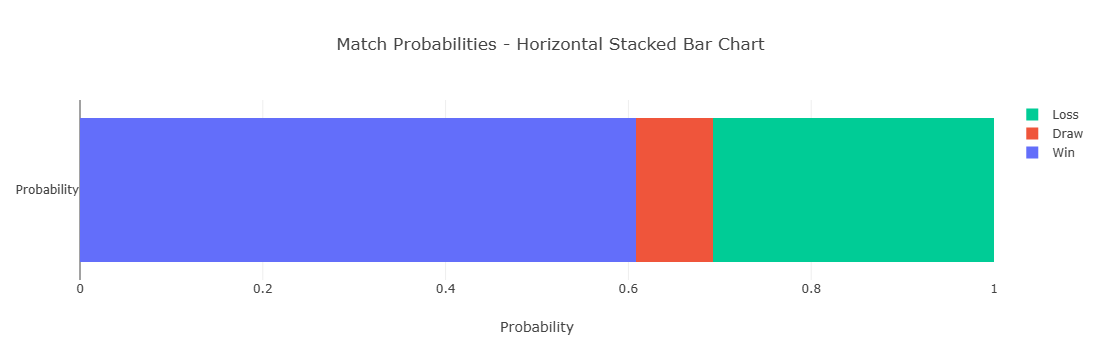

In [605]:
#horizontal stacked bar graph
labels = ['Win', 'Draw', 'Loss']
values = [combined_predict[2], combined_predict[1], combined_predict[0]]  
colors = ['#636EFA', '#EF553B', '#00CC96']

fig = go.Figure()

fig.add_trace(go.Bar(
    y=['Probability'], 
    x=[values[0]], 
    name='Win',
    orientation='h',
    marker=dict(color=colors[0])  
))

fig.add_trace(go.Bar(
    y=['Probability'],
    x=[values[1]], 
    name='Draw',
    orientation='h',
    marker=dict(color=colors[1])  
))

fig.add_trace(go.Bar(
    y=['Probability'],
    x=[values[2]],  
    name='Loss',
    orientation='h',
    marker=dict(color=colors[2]) 
))

fig.update_layout(
    barmode='stack',
    title='Match Probabilities - Horizontal Stacked Bar Chart',
    xaxis_title='Probability',
    yaxis_title='',
    xaxis=dict(range=[0, 1]), 
    showlegend=True
)

fig.show()


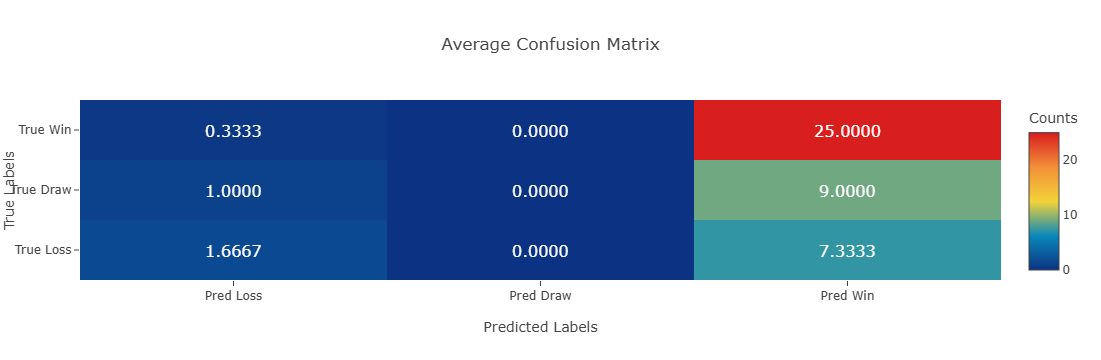

In [607]:
#heatmap of confusion matrix
fig = go.Figure(data=go.Heatmap(
    z=labeled_avg_conf_matrix.values, 
    x=labeled_avg_conf_matrix.columns,  
    y=labeled_avg_conf_matrix.index,  
    colorscale='Portland', 
    colorbar=dict(title='Counts'),
    hoverongaps=False  
))

for i in range(len(labeled_avg_conf_matrix)):
    for j in range(len(labeled_avg_conf_matrix.columns)):
        fig.add_annotation(
            x=j,
            y=i,
            text=f"{labeled_avg_conf_matrix.iloc[i, j]:.4f}",  
            showarrow=False,
            font=dict(color="white", size=16), 
            align="center"
        )

fig.update_layout(
    title='Average Confusion Matrix',
    xaxis_title='Predicted Labels',
    yaxis_title='True Labels',
    xaxis=dict(tickmode='array', tickvals=[0, 1, 2]), 
    yaxis=dict(tickmode='array', tickvals=[0, 1, 2]),
)

# Show the figure
fig.show()


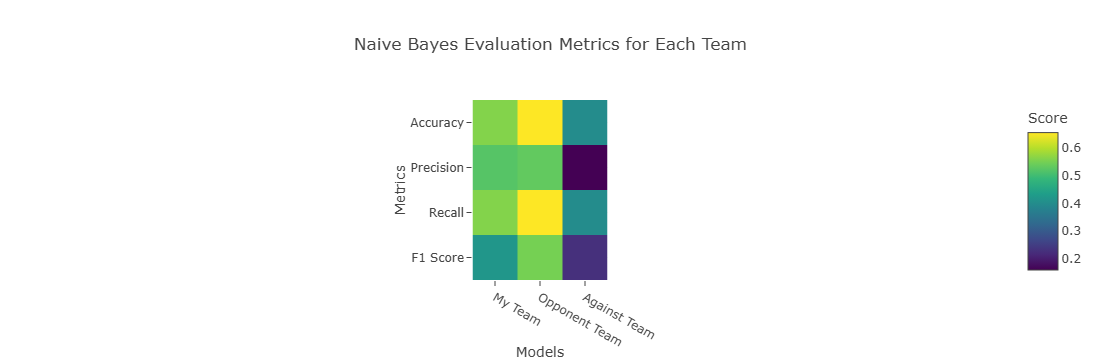

In [609]:
#heatmap of evaluation matrix
metrics_df_naive_bayes = pd.DataFrame({
    'Model': ['My Team', 'Opponent Team', 'Against Team'],
    'Accuracy': [eval_nb1['accuracy'], eval_nb2['accuracy'], eval_nb3['accuracy']],
    'Precision': [eval_nb1['precision'], eval_nb2['precision'], eval_nb3['precision']],
    'Recall': [eval_nb1['recall'], eval_nb2['recall'], eval_nb3['recall']],
    'F1 Score': [eval_nb1['f1_score'], eval_nb2['f1_score'], eval_nb3['f1_score']]
})

fig = px.imshow(metrics_df_naive_bayes.set_index('Model').T, 
                labels=dict(x="Models", y="Metrics", color="Score"),
                color_continuous_scale='Viridis',  
                title="Naive Bayes Evaluation Metrics for Each Team")

fig.show()


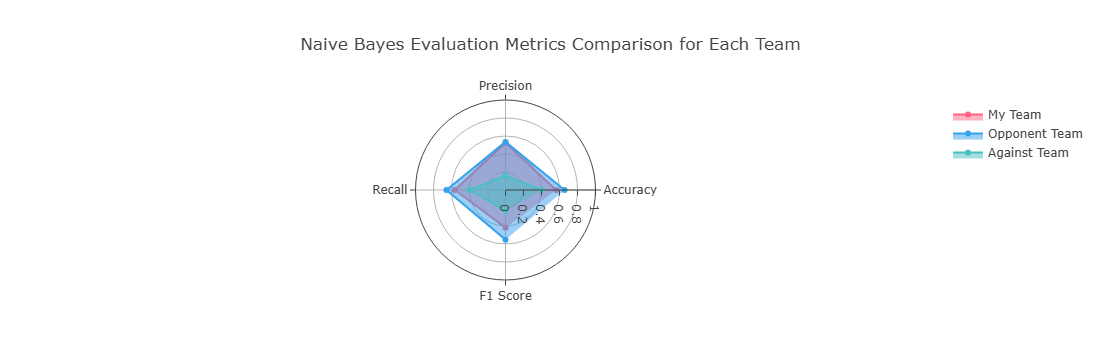

In [611]:
#radar chart of evaluation metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
myteam_metrics_nb = [eval_nb1['accuracy'], eval_nb1['precision'], eval_nb1['recall'], eval_nb1['f1_score']]
oppteam_metrics_nb = [eval_nb2['accuracy'], eval_nb2['precision'], eval_nb2['recall'], eval_nb2['f1_score']]
against_metrics_nb = [eval_nb3['accuracy'], eval_nb3['precision'], eval_nb3['recall'], eval_nb3['f1_score']]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=myteam_metrics_nb,
    theta=labels,
    fill='toself',
    name='My Team',
    line=dict(color='rgb(255, 99, 132)') 
))

fig.add_trace(go.Scatterpolar(
    r=oppteam_metrics_nb,
    theta=labels,
    fill='toself',
    name='Opponent Team',
    line=dict(color='rgb(54, 162, 235)')
))

fig.add_trace(go.Scatterpolar(
    r=against_metrics_nb,
    theta=labels,
    fill='toself',
    name='Against Team',
    line=dict(color='rgb(75, 192, 192)')  
))

fig.update_layout(
    title='Naive Bayes Evaluation Metrics Comparison for Each Team',
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    showlegend=True
)

fig.show()


In [613]:

final_probs = combined_predict
print(f"Final Match Probabilities - Loss: {final_probs[0]:.2f}, Draw: {final_probs[1]:.2f}, Win: {final_probs[2]:.2f}")

Final Match Probabilities - Loss: 0.31, Draw: 0.08, Win: 0.61


In [615]:

training_size = int(len(myteam_df)*0.80)
data_len = len(myteam_df)

train, test = myteam_df[0:training_size],myteam_df[training_size:data_len]

train = train.loc[:, ["Result_encoded"]].values

scaler = MinMaxScaler(feature_range=(0, 2))
train_scaled = scaler.fit_transform(train)

### Recurrent Neural Network

In [617]:

def train_rnn(data, timesteps, feature_columns, target_column, num_classes=3):
   
    train = data.loc[:, feature_columns].values
    scaler = MinMaxScaler(feature_range=(0, 2))
    train_scaled = scaler.fit_transform(train)

    X_train, y_train = [], []
    for i in range(timesteps, len(train_scaled)):
        X_train.append(train_scaled[i-timesteps:i, :])
        y_train.append(train_scaled[i, target_column])

    X_train, y_train = np.array(X_train), np.array(y_train)
    y_train = to_categorical(y_train, num_classes=num_classes)

    model = Sequential()
    model.add(SimpleRNN(units=50, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(units=50, activation="tanh"))
    model.add(Dropout(0.2))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)
    print(X_train.shape)

    
    return model, scaler


In [619]:
timesteps = 10
myteam_model, myteam_scaler = train_rnn(myteam_df, timesteps, ["Result_encoded"], 0)
oppteam_model, oppteam_scaler = train_rnn(oppteam_df, timesteps, ["Result_encoded"], 0)
against_model, against_scaler = train_rnn(df_against, 2, ["Result_encoded"], 0)


Epoch 1/50


C:\Users\bassam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4345 - loss: 1.1448
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5893 - loss: 1.0622 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5200 - loss: 1.0388 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5657 - loss: 0.9504 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5652 - loss: 0.9686 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6071 - loss: 0.9369 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6306 - loss: 0.8985 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6902 - loss: 0.8414 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6514 - loss: 0.8303 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5632 - loss: 0.9308 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6391 - loss: 0.8792 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6246 - loss: 0.9152 
Epoch 13/50
8

C:\Users\bassam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4268 - loss: 1.1710
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6116 - loss: 0.9775 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6464 - loss: 0.9237 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5971 - loss: 0.9737 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5994 - loss: 0.9354 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6165 - loss: 0.9073 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6877 - loss: 0.8674 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6315 - loss: 0.8912 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6076 - loss: 0.9207 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6398 - loss: 0.9396 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6689 - loss: 0.8452 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6035 - loss: 0.9187 
Epoch 13/50
8

C:\Users\bassam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3333 - loss: 1.2579
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4000 - loss: 1.2447
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4667 - loss: 1.1195
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6667 - loss: 0.8944
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4667 - loss: 1.0530
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4667 - loss: 1.0270
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4000 - loss: 0.9946
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4667 - loss: 0.9627
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6000 - loss: 0.9242
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4667 - loss: 0.9454
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6000 - loss: 0.8915
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6667 - loss: 0.8716
Epoch 13/50
1/

In [621]:

def prepare_test_data(data, scaler, timesteps, feature_columns):
    inputs = data.loc[:, feature_columns].values
    inputs_scaled = scaler.transform(inputs)
    
    X_test = []
    for i in range(timesteps, len(inputs_scaled)):
        X_test.append(inputs_scaled[i-timesteps:i, :])

    return np.array(X_test)

X_test_myteam = prepare_test_data(myteam_df, myteam_scaler, timesteps, ["Result_encoded"])
X_test_oppteam = prepare_test_data(oppteam_df, oppteam_scaler, timesteps, ["Result_encoded"])
X_test_against = prepare_test_data(df_against, against_scaler, 2, ["Result_encoded"])

y_test_myteam = myteam_df.loc[timesteps:, "Result_encoded"].values
y_test_oppteam = oppteam_df.loc[timesteps:, "Result_encoded"].values
y_test_against = df_against.loc[2:, "Result_encoded"].values

predict_myteam = myteam_model.predict(X_test_myteam)
predict_oppteam = oppteam_model.predict(X_test_oppteam)
predict_against = against_model.predict(X_test_against)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


In [629]:

min_length = min(len(predict_myteam), len(predict_oppteam), len(predict_against))

predict_myteam = predict_myteam[:min_length]
predict_oppteam = predict_oppteam[:min_length]
predict_against = predict_against[:min_length]

predict_oppteam = predict_oppteam[:, ::-1]

combined_predict = (predict_myteam + predict_oppteam + predict_against) / 3

Final Match Probabilities - Win: 0.49, Draw: 0.16, Loss: 0.35


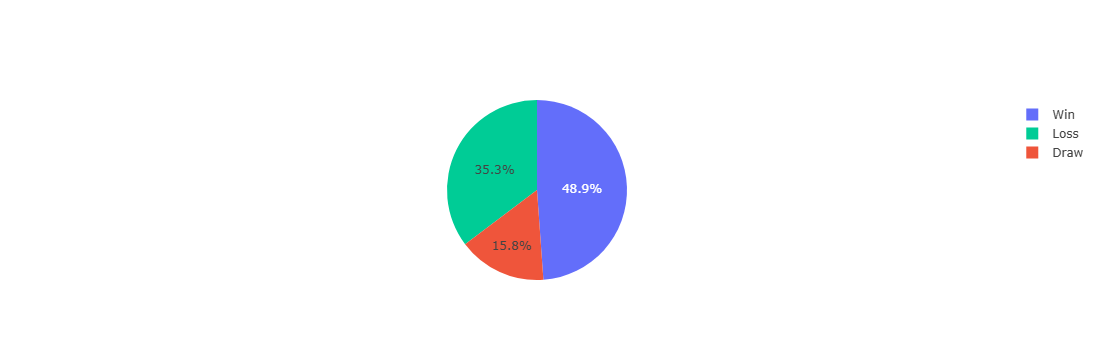

In [631]:

final_probs = combined_predict[-1]
print(f"Final Match Probabilities - Win: {final_probs[2]:.2f}, Draw: {final_probs[1]:.2f}, Loss: {final_probs[0]:.2f}")

labels = ['Win', 'Draw', 'Loss' ]
values = [final_probs[2], final_probs[1], final_probs[0]]

colors = ['#636EFA', '#EF553B', '#00CC96']

#pie chart
fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values,
    marker=dict(colors=colors)  
)])

fig.show()


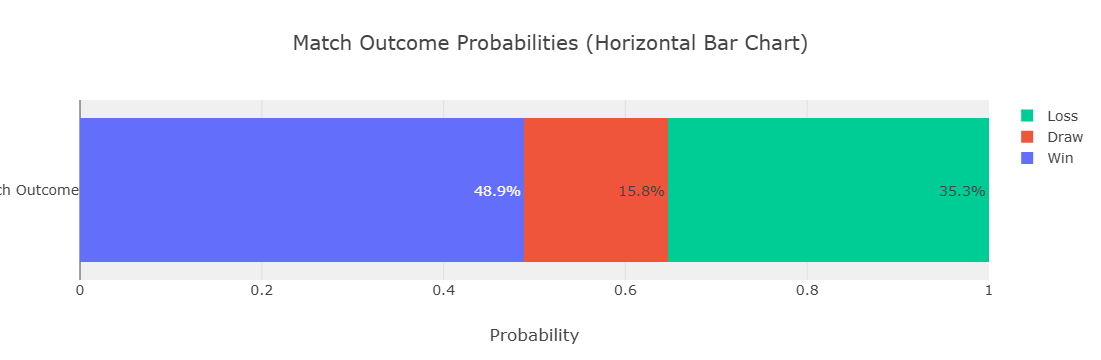

In [633]:
#horizontal stacked bar chart for RNN
labels = ['Win', 'Draw', 'Loss']
values = [final_probs[2], final_probs[1], final_probs[0]]  
colors = ['#636EFA', '#EF553B', '#00CC96']

fig_bar = go.Figure()

fig_bar.add_trace(go.Bar(
    x=[values[0]],  
    y=['Match Outcome'],
    orientation='h',
    name='Win',
    marker=dict(color=colors[0]),
    text=[f"{values[0] * 100:.1f}%"], 
    textposition='inside'
))

fig_bar.add_trace(go.Bar(
    x=[values[1]],  
    y=['Match Outcome'],
    orientation='h',
    name='Draw',
    marker=dict(color=colors[1]),
    text=[f"{values[1] * 100:.1f}%"],
    textposition='inside'
))

fig_bar.add_trace(go.Bar(
    x=[values[2]],  
    y=['Match Outcome'],
    orientation='h',
    name='Loss',
    marker=dict(color=colors[2]),
    text=[f"{values[2] * 100:.1f}%"],
    textposition='inside'
))

fig_bar.update_layout(
    title="Match Outcome Probabilities (Horizontal Bar Chart)",
    barmode='stack', 
    xaxis=dict(title="Probability", range=[0, 1]),
    yaxis=dict(title=""),
    plot_bgcolor='rgb(240, 240, 240)',
    font=dict(size=14),
    showlegend=True
)

fig_bar.show()



--- Evaluation for My Team ---
Accuracy: 0.73
Precision: 0.54
Recall: 0.73
F1 Score: 0.62
Confusion Matrix:
[[ 0  0  2]
 [ 0  0  2]
 [ 0  0 11]]

--- Evaluation for Opponent Team ---
Accuracy: 0.67
Precision: 0.59
Recall: 0.67
F1 Score: 0.57
Confusion Matrix:
[[0 0 3]
 [0 1 2]
 [0 0 9]]

--- Evaluation for Against Team ---
Accuracy: 0.27
Precision: 0.16
Recall: 0.27
F1 Score: 0.20
Confusion Matrix:
[[4 0 3]
 [0 0 0]
 [8 0 0]]

--- Average Metrics ---
Accuracy: 0.56
Precision: 0.43
Recall: 0.56
F1 Score: 0.46

Average Confusion Matrix (Labeled):
           Loss      Draw       Win
Loss  1.333333  0.000000  2.666667
Draw  0.000000  0.333333  1.333333
Win   2.666667  0.000000  6.666667


C:\Users\bassam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\bassam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



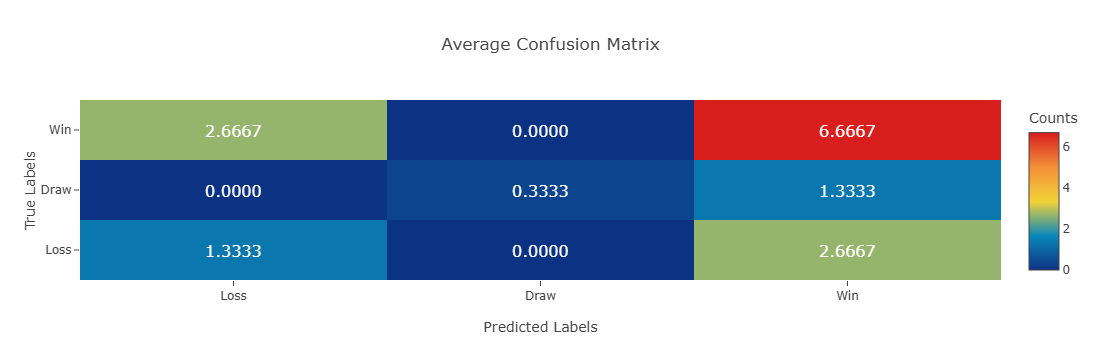

In [635]:
#evaluation metrics
def evaluate_predictions(y_true, y_pred_prob, num_classes=3):
  
    if len(y_pred_prob) > len(y_true):
        y_pred_prob = y_pred_prob[:len(y_true)]
    elif len(y_true) > len(y_pred_prob):
        y_true = y_true[:len(y_pred_prob)]

    y_pred = np.argmax(y_pred_prob, axis=1)

    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')

    confusion = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])

    return accuracy, precision, recall, f1, confusion

metrics_myteam = evaluate_predictions(y_test_myteam, predict_myteam)
metrics_oppteam = evaluate_predictions(y_test_oppteam, predict_oppteam)
metrics_against = evaluate_predictions(y_test_against, predict_against)

print("\n--- Evaluation for My Team ---")
print(f"Accuracy: {metrics_myteam[0]:.2f}")
print(f"Precision: {metrics_myteam[1]:.2f}")
print(f"Recall: {metrics_myteam[2]:.2f}")
print(f"F1 Score: {metrics_myteam[3]:.2f}")
print(f"Confusion Matrix:\n{metrics_myteam[4]}")

print("\n--- Evaluation for Opponent Team ---")
print(f"Accuracy: {metrics_oppteam[0]:.2f}")
print(f"Precision: {metrics_oppteam[1]:.2f}")
print(f"Recall: {metrics_oppteam[2]:.2f}")
print(f"F1 Score: {metrics_oppteam[3]:.2f}")
print(f"Confusion Matrix:\n{metrics_oppteam[4]}")

print("\n--- Evaluation for Against Team ---")
print(f"Accuracy: {metrics_against[0]:.2f}")
print(f"Precision: {metrics_against[1]:.2f}")
print(f"Recall: {metrics_against[2]:.2f}")
print(f"F1 Score: {metrics_against[3]:.2f}")
print(f"Confusion Matrix:\n{metrics_against[4]}")

average_accuracy = np.mean([metrics_myteam[0], metrics_oppteam[0], metrics_against[0]])
average_precision = np.mean([metrics_myteam[1], metrics_oppteam[1], metrics_against[1]])
average_recall = np.mean([metrics_myteam[2], metrics_oppteam[2], metrics_against[2]])
average_f1 = np.mean([metrics_myteam[3], metrics_oppteam[3], metrics_against[3]])

combined_confusion = (
    metrics_myteam[4] + metrics_oppteam[4] + metrics_against[4]
) / 3

all_target_names = ['Loss', 'Draw', 'Win']

print("\n--- Average Metrics ---")
print(f"Accuracy: {average_accuracy:.2f}")
print(f"Precision: {average_precision:.2f}")
print(f"Recall: {average_recall:.2f}")
print(f"F1 Score: {average_f1:.2f}")
print("\nAverage Confusion Matrix (Labeled):\n", combined_confusion_df)

#pie chart 
fig = go.Figure(data=go.Heatmap(
    z=combined_confusion_df.values,  
    x=combined_confusion_df.columns,  
    y=combined_confusion_df.index,    
    colorscale='Portland', 
    colorbar=dict(title='Counts'),
    hoverongaps=False  
))

for i in range(len(combined_confusion_df)):
    for j in range(len(combined_confusion_df.columns)):
        fig.add_annotation(
            x=j,
            y=i,
            text=f"{combined_confusion_df.iloc[i, j]:.4f}",  
            showarrow=False,
            font=dict(color="white", size=16),  
            align="center"
        )

fig.update_layout(
    title='Average Confusion Matrix',
    xaxis_title='Predicted Labels',
    yaxis_title='True Labels',
    xaxis=dict(tickmode='array', tickvals=[0, 1, 2]), 
    yaxis=dict(tickmode='array', tickvals=[0, 1, 2]),
)

fig.show()


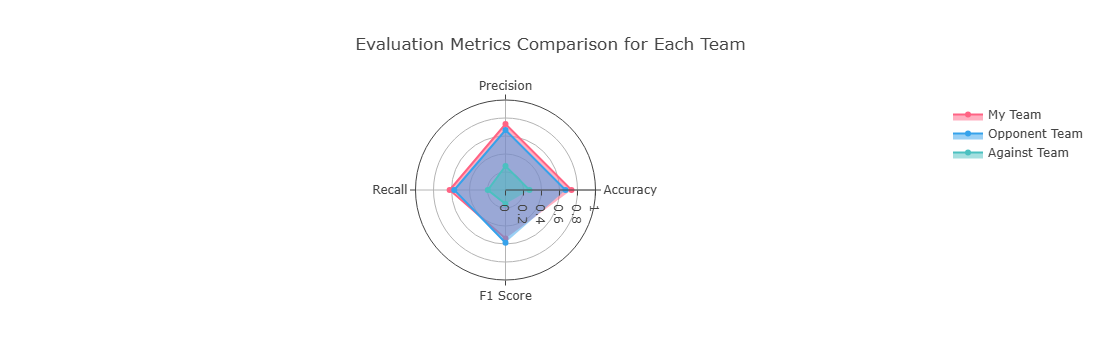

In [637]:
#radar chart for evaluation metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
myteam_metrics = [metrics_myteam[0], metrics_myteam[2], metrics_myteam[3], metrics_myteam[1]]
oppteam_metrics = [metrics_oppteam[0], metrics_oppteam[2], metrics_oppteam[3], metrics_oppteam[1]]
against_metrics = [metrics_against[0], metrics_against[2], metrics_against[3], metrics_against[1]]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=myteam_metrics,
    theta=labels,
    fill='toself',
    name='My Team',
    line=dict(color='rgb(255, 99, 132)') 
))

fig.add_trace(go.Scatterpolar(
    r=oppteam_metrics,
    theta=labels,
    fill='toself',
    name='Opponent Team',
    line=dict(color='rgb(54, 162, 235)')  
))

fig.add_trace(go.Scatterpolar(
    r=against_metrics,
    theta=labels,
    fill='toself',
    name='Against Team',
    line=dict(color='rgb(75, 192, 192)')  
))

fig.update_layout(
    title='Evaluation Metrics Comparison for Each Team',
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    showlegend=True
)

fig.show()


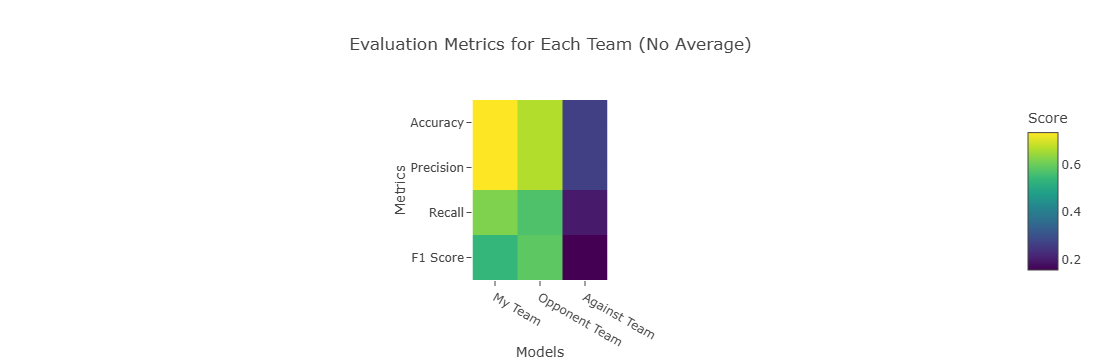

In [639]:
#heatmap for evaluation metrics
metrics_df_separate = pd.DataFrame({
    'Model': ['My Team', 'Opponent Team', 'Against Team'],
    'Accuracy': [metrics_myteam[0], metrics_oppteam[0], metrics_against[0]],
    'Precision': [metrics_myteam[2], metrics_oppteam[2], metrics_against[2]],
    'Recall': [metrics_myteam[3], metrics_oppteam[3], metrics_against[3]],
    'F1 Score': [metrics_myteam[1], metrics_oppteam[1], metrics_against[1]]
})

fig = px.imshow(
    metrics_df_separate.set_index('Model').T,
    labels=dict(x="Models", y="Metrics", color="Score"),
    color_continuous_scale='Viridis', 
    title="Evaluation Metrics for Each Team (No Average)"
)

fig.show()


### Long Short Term Memory Recureent Neural Network 

In [641]:


def train_lstm(data, timesteps, feature_columns, target_column, num_classes=3, epochs=50, batch_size=32):

    train = data.loc[:, feature_columns].values
    scaler = MinMaxScaler(feature_range=(0, 2))
    train_scaled = scaler.fit_transform(train)

    X_train, y_train = [], []
    for i in range(timesteps, len(train_scaled)):
        X_train.append(train_scaled[i - timesteps:i, :])
        y_train.append(train_scaled[i, target_column])

    X_train, y_train = np.array(X_train), np.array(y_train)
    y_train = to_categorical(y_train, num_classes=num_classes)

    model = Sequential()
    model.add(LSTM(units=50, activation="tanh", return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, activation="tanh"))
    model.add(Dropout(0.2))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

    return model, scaler


In [643]:
timesteps = 10

def split_data(data, feature_columns, train_ratio=0.8):
    train_size = int(len(data) * train_ratio)
    train_df = data.iloc[:train_size]
    test_df = data.iloc[train_size:]
    return train_df, test_df

feature_columns = ["Result_encoded"]
target_column = 0 


In [645]:
def prepare_test_data(train_df, test_df, scaler, timesteps, feature_columns, target_column):
    test = test_df.loc[:, feature_columns].values
    test_scaled = scaler.transform(test)

    last_train_sequence = train_df.loc[-timesteps:, feature_columns].values
    last_train_scaled = scaler.transform(last_train_sequence)

    combined_scaled = np.concatenate((last_train_scaled, test_scaled), axis=0)

    X_test = []
    for i in range(timesteps, timesteps + len(test_scaled)):
        X_test.append(combined_scaled[i - timesteps:i, :])

    X_test = np.array(X_test)
    return X_test


In [647]:

myteam_train, myteam_test = split_data(myteam_df, feature_columns)
oppteam_train, oppteam_test = split_data(oppteam_df, feature_columns)
against_train, against_test = split_data(df_against, feature_columns)

myteam_model, myteam_scaler = train_lstm(myteam_train, timesteps, feature_columns, target_column)
oppteam_model, oppteam_scaler = train_lstm(oppteam_train, timesteps, feature_columns, target_column)
against_model, against_scaler = train_lstm(against_train, 2, feature_columns, target_column)

X_test_myteam = prepare_test_data(myteam_train, myteam_test, myteam_scaler, timesteps, feature_columns, target_column)
X_test_oppteam = prepare_test_data(oppteam_train, oppteam_test, oppteam_scaler, timesteps, feature_columns, target_column)
X_test_against = prepare_test_data(against_train, against_test, against_scaler, 2, feature_columns, target_column)

predict_myteam = myteam_model.predict(X_test_myteam)
predict_oppteam = oppteam_model.predict(X_test_oppteam)
predict_against = against_model.predict(X_test_against)


Epoch 1/50


C:\Users\bassam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.5783 - loss: 1.0298
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6135 - loss: 0.9409 
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6072 - loss: 0.9493 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6200 - loss: 0.9417 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5598 - loss: 1.0027 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5905 - loss: 0.9833 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6231 - loss: 0.9429 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6024 - loss: 0.9519 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6026 - loss: 0.9440 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6511 - loss: 0.8987 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6047 - loss: 0.9521 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5563 - loss: 1.0065 
Epoch 13/50
7

C:\Users\bassam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6497 - loss: 1.0305
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6395 - loss: 0.8982 
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6706 - loss: 0.8788 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6683 - loss: 0.9036 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6674 - loss: 0.8701 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6999 - loss: 0.8548 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6639 - loss: 0.8811 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6717 - loss: 0.8753 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7068 - loss: 0.8151 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6555 - loss: 0.8975 
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6618 - loss: 0.8808 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6603 - loss: 0.8985 
Epoch 13/50
7

C:\Users\bassam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.6364 - loss: 1.0914
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6364 - loss: 1.0866
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1818 - loss: 1.0861
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5455 - loss: 1.0713
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1818 - loss: 1.0745
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5455 - loss: 1.0657
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4545 - loss: 1.0619
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6364 - loss: 1.0510
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5455 - loss: 1.0454
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6364 - loss: 1.0344
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5455 - loss: 1.0366
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4545 - loss: 1.0324
Epoch 13/50
1/

Final Match Probabilities - Win: 0.57, Draw: 0.18, Loss: 0.25


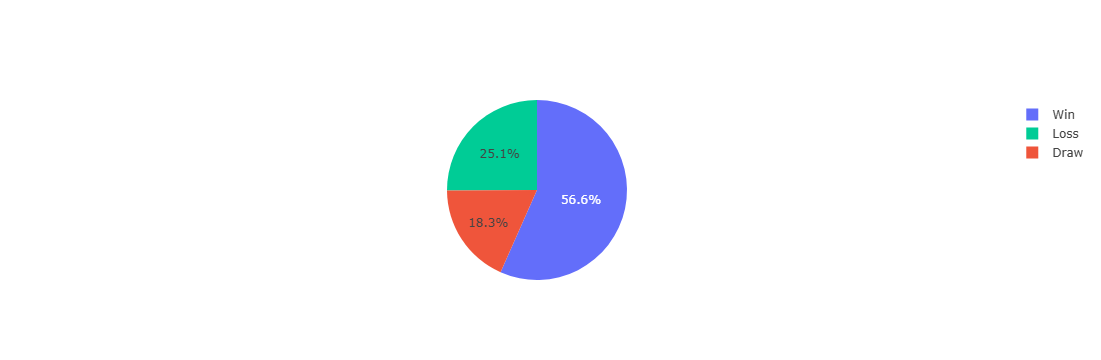

In [667]:

min_length = min(len(predict_myteam), len(predict_oppteam), len(predict_against))
predict_myteam = predict_myteam[:min_length]
predict_oppteam = predict_oppteam[:min_length]
predict_against = predict_against[:min_length]

combined_predict = (predict_myteam + predict_oppteam + predict_against) / 3

final_probs = combined_predict[-1]
print(f"Final Match Probabilities - Win: {final_probs[2]:.2f}, Draw: {final_probs[1]:.2f}, Loss: {final_probs[0]:.2f}")
#pie chart 
labels = ['Win', 'Draw', 'Loss' ]
values = [final_probs[2], final_probs[1], final_probs[0]]

colors = ['#636EFA', '#EF553B', '#00CC96']

fig = go.Figure(data=[go.Pie(
    labels=labels, 
    values=values,
    marker=dict(colors=colors)  
)])

fig.show()

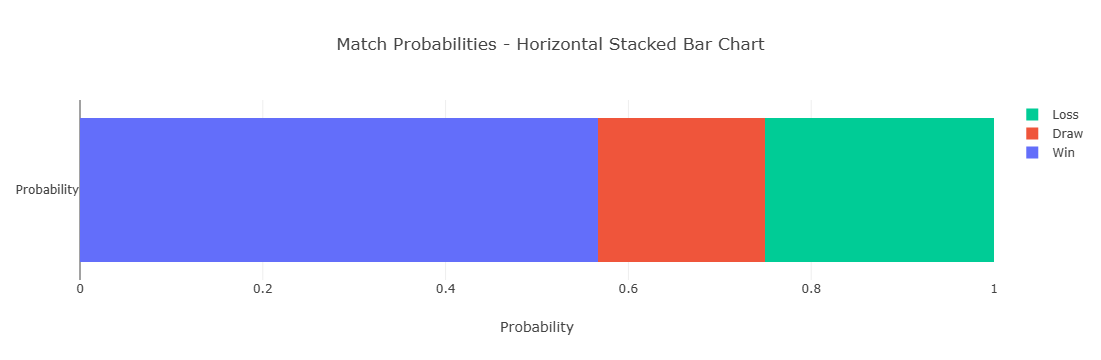

In [671]:
#Horizontal stacked bar graph
labels = ['Win', 'Draw', 'Loss']
values = [final_probs[2], final_probs[1], final_probs[0]]  
colors = ['#636EFA', '#EF553B', '#00CC96']

fig = go.Figure()

fig.add_trace(go.Bar(
    y=['Probability'],
    x=[values[0]],
    name='Win',
    orientation='h',
    marker=dict(color=colors[0])  
))

fig.add_trace(go.Bar(
    y=['Probability'],
    x=[values[1]], 
    name='Draw',
    orientation='h',
    marker=dict(color=colors[1])  
))

fig.add_trace(go.Bar(
    y=['Probability'],
    x=[values[2]],  
    name='Loss',
    orientation='h',
    marker=dict(color=colors[2])  #
))

fig.update_layout(
    barmode='stack',
    title='Match Probabilities - Horizontal Stacked Bar Chart',
    xaxis_title='Probability',
    yaxis_title='',
    xaxis=dict(range=[0, 1]), 
    showlegend=True
)

fig.show()


In [659]:
#evaluation metrics
def standardize_confusion_matrix(conf_matrix, num_classes=3):

    standardized_matrix = np.zeros((num_classes, num_classes), dtype=int)
 
    rows, cols = conf_matrix.shape
    for i in range(rows):
        for j in range(cols):
            standardized_matrix[i, j] = conf_matrix[i, j]
    
    return standardized_matrix

def evaluate_predictions(y_true, y_pred_prob):

    if len(y_pred_prob) > len(y_true):
        y_pred_prob = y_pred_prob[:len(y_true)]
    elif len(y_true) > len(y_pred_prob):
        y_true = y_true[:len(y_pred_prob)]

    y_pred = np.argmax(y_pred_prob, axis=1)

    unique_classes = np.unique(y_true)
    all_target_names = ['Loss', 'Draw', 'Win']
    target_names = [all_target_names[i] for i in unique_classes]

    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    confusion = confusion_matrix(y_true, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print("\nConfusion Matrix:\n", confusion)

    standardized_confusion = standardize_confusion_matrix(confusion)
    
    return accuracy, f1, precision, recall, standardized_confusion

print("\n--- Evaluation for My Team ---")
metrics_myteam = evaluate_predictions(y_test_myteam, predict_myteam)

print("\n--- Evaluation for Opponent Team ---")
metrics_oppteam = evaluate_predictions(y_test_oppteam, predict_oppteam)

print("\n--- Evaluation for Against Team ---")
metrics_against = evaluate_predictions(y_test_against, predict_against)

average_accuracy = np.mean([metrics_myteam[0], metrics_oppteam[0], metrics_against[0]])
average_f1 = np.mean([metrics_myteam[1], metrics_oppteam[1], metrics_against[1]])
average_precision = np.mean([metrics_myteam[2], metrics_oppteam[2], metrics_against[2]])
average_recall = np.mean([metrics_myteam[3], metrics_oppteam[3], metrics_against[3]])

combined_confusion = (
    metrics_myteam[4] + metrics_oppteam[4] + metrics_against[4]
) / 3

all_target_names = ['Loss', 'Draw', 'Win']
combined_confusion_df = pd.DataFrame(combined_confusion, index=all_target_names, columns=all_target_names)

print("\n--- Average Metrics ---")
print(f"Average Accuracy: {average_accuracy:.2f}")
print(f"Average F1 Score: {average_f1:.2f}")
print(f"Average Precision: {average_precision:.2f}")
print(f"Average Recall: {average_recall:.2f}")
print("\nAverage Confusion Matrix (Labeled):\n", combined_confusion_df)



--- Evaluation for My Team ---
Accuracy: 0.75
F1 Score: 0.64
Precision: 0.56
Recall: 0.75

Confusion Matrix:
 [[0 1]
 [0 3]]

--- Evaluation for Opponent Team ---
Accuracy: 0.50
F1 Score: 0.33
Precision: 0.25
Recall: 0.50

Confusion Matrix:
 [[0 0 1]
 [0 0 1]
 [0 0 2]]

--- Evaluation for Against Team ---
Accuracy: 0.50
F1 Score: 0.33
Precision: 0.25
Recall: 0.50

Confusion Matrix:
 [[0 2]
 [0 2]]

--- Average Metrics ---
Average Accuracy: 0.58
Average F1 Score: 0.44
Average Precision: 0.35
Average Recall: 0.58

Average Confusion Matrix (Labeled):
       Loss      Draw       Win
Loss   0.0  1.000000  0.333333
Draw   0.0  1.666667  0.333333
Win    0.0  0.000000  0.666667


C:\Users\bassam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\bassam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\bassam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



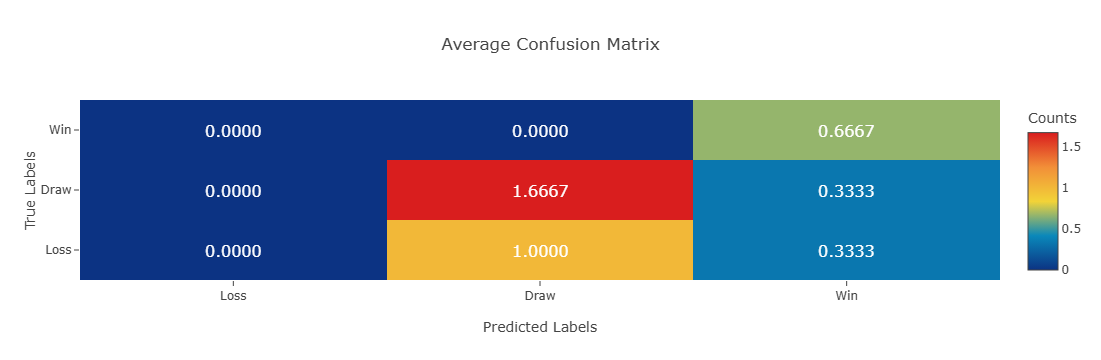

In [661]:
#heatmap for confusion matrix
fig = go.Figure(data=go.Heatmap(
    z=combined_confusion_df.values, 
    x=combined_confusion_df.columns,  
    y=combined_confusion_df.index,    
    colorscale='Portland',  
    colorbar=dict(title='Counts'),
    hoverongaps=False  
))


for i in range(len(combined_confusion_df)):
    for j in range(len(combined_confusion_df.columns)):
        fig.add_annotation(
            x=j,
            y=i,
            text=f"{combined_confusion_df.iloc[i, j]:.4f}",  
            showarrow=False,
            font=dict(color="white", size=16),  
            align="center"
        )

fig.update_layout(
    title='Average Confusion Matrix',
    xaxis_title='Predicted Labels',
    yaxis_title='True Labels',
    xaxis=dict(tickmode='array', tickvals=[0, 1, 2]),  
    yaxis=dict(tickmode='array', tickvals=[0, 1, 2]),
)

fig.show()


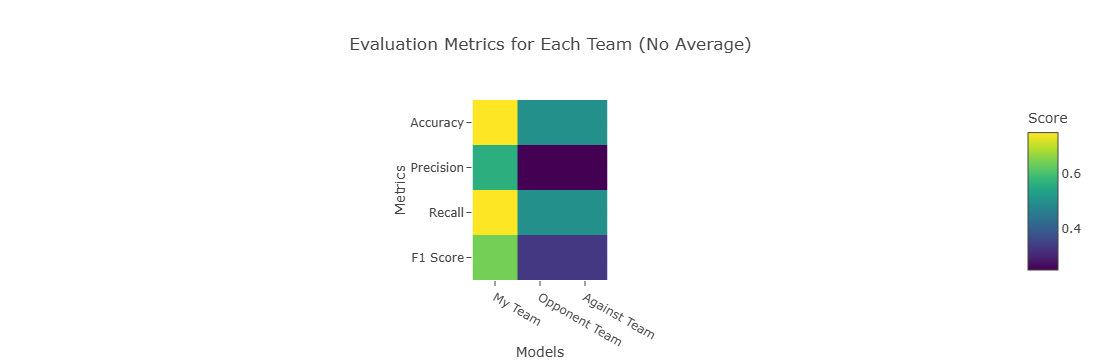

In [673]:
#heatmap for evaluation metrics 
metrics_df_separate = pd.DataFrame({
    'Model': ['My Team', 'Opponent Team', 'Against Team'],
    'Accuracy': [metrics_myteam[0], metrics_oppteam[0], metrics_against[0]],
    'Precision': [metrics_myteam[2], metrics_oppteam[2], metrics_against[2]],
    'Recall': [metrics_myteam[3], metrics_oppteam[3], metrics_against[3]],
    'F1 Score': [metrics_myteam[1], metrics_oppteam[1], metrics_against[1]]
})

fig = px.imshow(metrics_df_separate.set_index('Model').T, 
                labels=dict(x="Models", y="Metrics", color="Score"),
                color_continuous_scale='Viridis',  
                title="Evaluation Metrics for Each Team (No Average)")

fig.show()


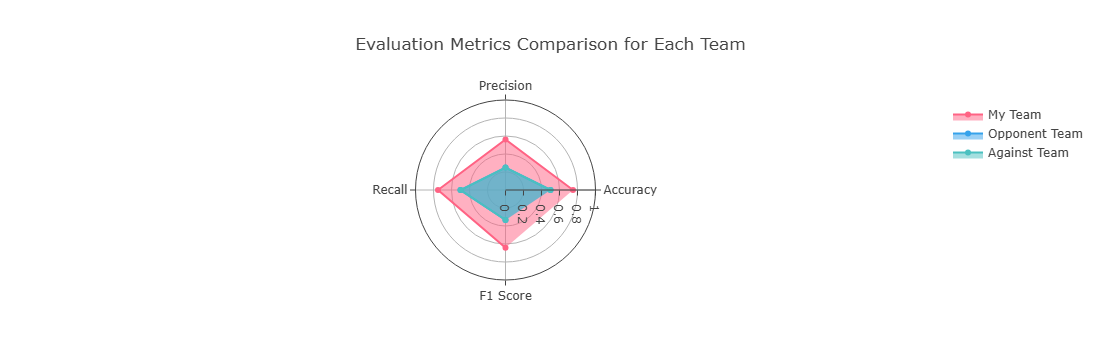

In [675]:
#radar chart for evaluation metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
myteam_metrics = [metrics_myteam[0], metrics_myteam[2], metrics_myteam[3], metrics_myteam[1]]
oppteam_metrics = [metrics_oppteam[0], metrics_oppteam[2], metrics_oppteam[3], metrics_oppteam[1]]
against_metrics = [metrics_against[0], metrics_against[2], metrics_against[3], metrics_against[1]]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=myteam_metrics,
    theta=labels,
    fill='toself',
    name='My Team',
    line=dict(color='rgb(255, 99, 132)') 
))

fig.add_trace(go.Scatterpolar(
    r=oppteam_metrics,
    theta=labels,
    fill='toself',
    name='Opponent Team',
    line=dict(color='rgb(54, 162, 235)')  
))

fig.add_trace(go.Scatterpolar(
    r=against_metrics,
    theta=labels,
    fill='toself',
    name='Against Team',
    line=dict(color='rgb(75, 192, 192)') 
))

fig.update_layout(
    title='Evaluation Metrics Comparison for Each Team',
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    showlegend=True
)

fig.show()


### Line Graph Visualisation of Team form against time

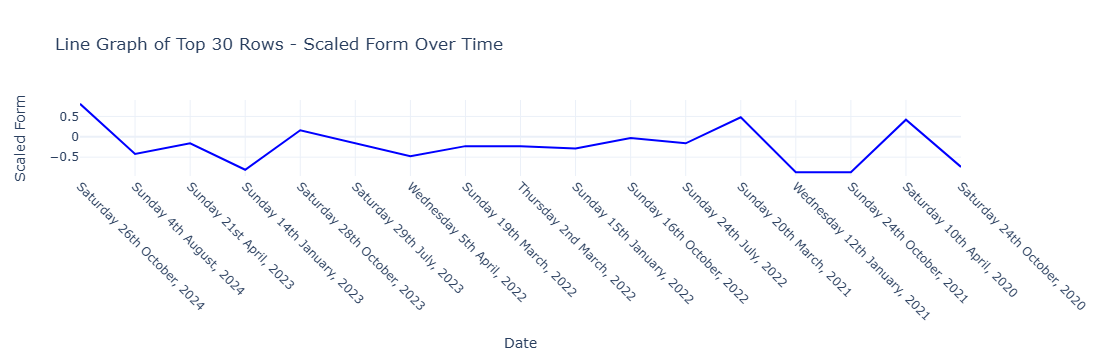

In [683]:


df_top30 = df_against.head(30)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_top30['Date'],  
    y=df_top30['Scaled_Form'],  
    mode='lines',  
    name='Scaled Form',
    line=dict(color='blue', width=2)
))

fig.update_layout(
    title="Line Graph of Top 30 Rows - Scaled Form Over Time",
    xaxis_title="Date",
    yaxis_title="Scaled Form",
    xaxis=dict(showgrid=True, tickformat='%Y-%m-%d', tickangle=45), 
    yaxis=dict(showgrid=True),
    template='plotly_white'  
)

fig.show()


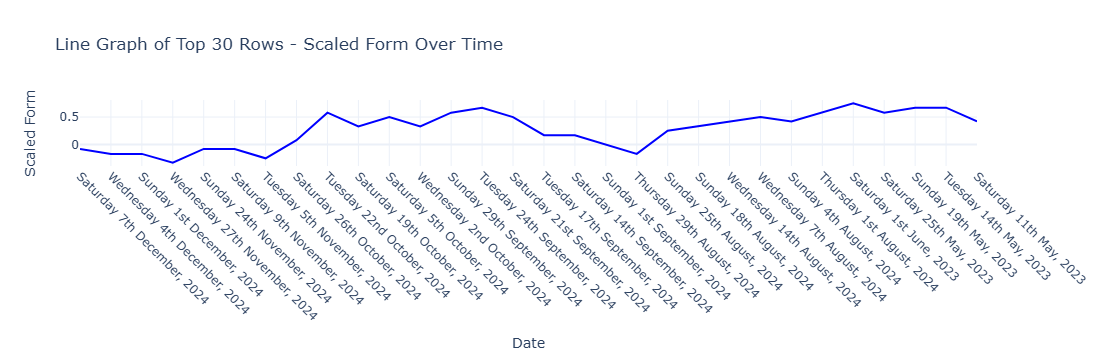

In [685]:
#line graph form agaisnt date for myteam_df

df_top30 = oppteam_df.head(30)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_top30['Date'],  
    y=df_top30['Scaled_Form'], 
    mode='lines',  
    name='Scaled Form',
    line=dict(color='blue', width=2) 
))

fig.update_layout(
    title="Line Graph of Top 30 Rows - Scaled Form Over Time",
    xaxis_title="Date",
    yaxis_title="Scaled Form",
    xaxis=dict(showgrid=True, tickformat='%Y-%m-%d', tickangle=45),  
    yaxis=dict(showgrid=True),
    template='plotly_white' 
)

fig.show()


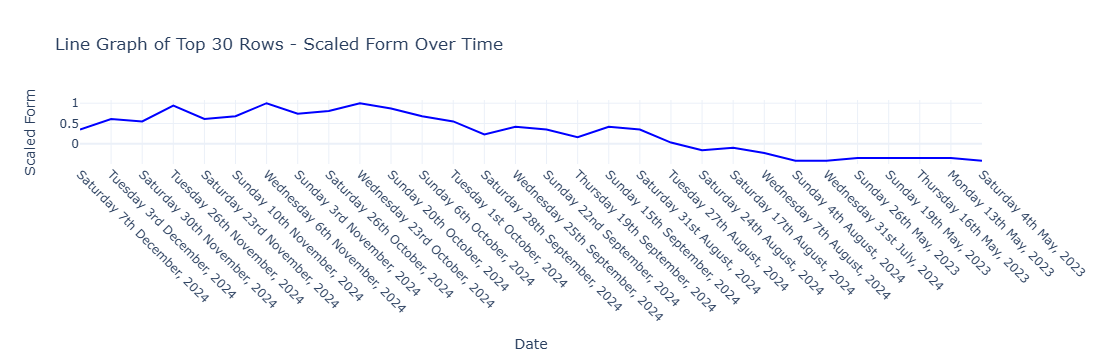

In [687]:
#line graph form agaisnt date for oppteam_df

df_top30 = myteam_df.head(30)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_top30['Date'],  
    y=df_top30['Scaled_Form'],  
    mode='lines',  
    name='Scaled Form',
    line=dict(color='blue', width=2)  
))


fig.update_layout(
    title="Line Graph of Top 30 Rows - Scaled Form Over Time",
    xaxis_title="Date",
    yaxis_title="Scaled Form",
    xaxis=dict(showgrid=True, tickformat='%Y-%m-%d', tickangle=45), 
    yaxis=dict(showgrid=True),
    template='plotly_white'  
)

fig.show()
